# Homework 6

## Problem 5 - Determine best $\lambda$

We have to determine the $\lambda$ among the given choices that results in the smallest out-of-sample error.


## Import libraries and read data

Let's first import libraries and read data into a pandas dataframe.

In [1]:
import pandas as pd                   # for reading in the data
import numpy as np
import matplotlib.pyplot as plt       # for data visualization

## Read in training and test set

In [2]:
df_train = pd.read_csv('in.dta.txt', names = ["x1", "x2", "y"], sep='\s+', dtype=np.float64)
df_test = pd.read_csv('out.dta.txt', names = ["x1", "x2", "y"], sep='\s+', dtype=np.float64)

## Create feature matrix $Z$ and extract labels $y$ from data

In [3]:
def get_feature_matrix_Z_and_label_y(dataframe):
    '''
    - Takes a pandas dataframe.
    - Returns the feature matrix Z and the labels y.
    '''
    x1 = np.array(dataframe['x1'])
    x2 = np.array(dataframe['x2'])
    y = np.array(dataframe['y'])
    N = dataframe.shape[0]
    
    # feature matrix Z with 8 columns
    Z = np.array([np.ones(N), x1, x2,
                  x1**2, x2**2, x1*x2,
                  np.absolute(x1-x2), np.absolute(x1+x2)]).T
    
    return (Z, y)

## Implement Linear Regression with regularization (weight decay)

In [4]:
def get_w_reg(Z, y, lambda_param):
    '''
    - Takes the feature matrix Z, the labels y 
      and the regularization parameter lambda_param.
    - Returns the weight vector w_reg via 
      linear regression with regularization (weight decay).
    '''
    
    num_columns_Z = Z.shape[1]
    
    # see lecture 12, slide 11
    Z_dagger_reg = np.dot(np.linalg.inv(np.dot(Z.T, Z) + lambda_param * np.identity(num_columns_Z)), Z.T)

    # Use linear regression with regularization to get weight vector
    w_reg = np.dot(Z_dagger_reg, y)

    return w_reg

## Compute out-of-sample classification error $E_{out}$ for different $\lambda$

In [5]:
# lambda parameters
# Tip: You can temporarily include k = -3 and k = +3 as a test to make sure
# you get the same values from problem 4 and 5.
params = [10**k for k in [2, 1, 0, -1, -2]]


# size of test set
N_test = df_test.shape[0]

# get feature matrix Z and labels y
Z_train, y_train = get_feature_matrix_Z_and_label_y(df_train)
Z_test, y_test = get_feature_matrix_Z_and_label_y(df_test)


# compute E_out for different lambda parameters
# Pay attention to use the correct feature matrix Z_train and Z_test respectively !
# For w_reg use Z_train and y_train, for E_out use Z_test and y_test !

min_E_out = 2**64
best_lambda = None

for lambda_param in params:
    w_reg = get_w_reg(Z_train, y_train, lambda_param)
    E_out = sum(y_test != np.sign(np.dot(Z_test, w_reg))) / N_test
    print('lambda = {0} => \t E_out = {1}'.format(lambda_param, E_out))
    if E_out < min_E_out:
        min_E_out = E_out
        best_lambda = lambda_param

print('\nThe smallest E_out is achieved for the choice lambda =', best_lambda, ', i.e. k =', np.log10(best_lambda))

lambda = 100 => 	 E_out = 0.228
lambda = 10 => 	 E_out = 0.124
lambda = 1 => 	 E_out = 0.092
lambda = 0.1 => 	 E_out = 0.056
lambda = 0.01 => 	 E_out = 0.084

The smallest E_out is achieved for the choice lambda = 0.1 , i.e. k = -1.0


## Pick answer

The answer is therefore **5[d]** -1.

__________________________________

# Problem 6

We have to find the best $\lambda$ (with $\lambda = 10^k$ and integer $k$) that minimizes $E_{out}$. We will also plot $E_{out}$ as a function of $\lambda$ to get an idea for the necessary range that we have to consider.

## 6.1 Check $\lambda=10^k$ for integer values $k$

Let's first check integer values $k$ from $-10$ to $10$, i.e. $\lambda$ from $10^{-10}$ to $10^{10}$.

In [6]:
# lambda parameters
params = [10**k for k in range(-10, 10, 1)]

# size of test set
N_test = df_test.shape[0]

# get feature matrix Z and labels y
Z_train, y_train = get_feature_matrix_Z_and_label_y(df_train)
Z_test, y_test = get_feature_matrix_Z_and_label_y(df_test)


# compute E_out for different lambda parameters
# Pay attention to use the correct feature matrix Z_train and Z_test respectively !
# For w_reg use Z_train and y_train, for E_out use Z_test and y_test !

min_E_out = 2**64
best_lambda = None

for lambda_param in params:
    w_reg = get_w_reg(Z_train, y_train, lambda_param)
    E_out = sum(y_test != np.sign(np.dot(Z_test, w_reg))) / N_test
    print('lambda = {0} => \t E_out = {1}'.format(lambda_param, E_out))
    if E_out < min_E_out:
        min_E_out = E_out
        best_lambda = lambda_param

print('\nThe smallest E_out is achieved for the choice lambda =', best_lambda, ' with E_out =', min_E_out)

lambda = 1e-10 => 	 E_out = 0.084
lambda = 1e-09 => 	 E_out = 0.084
lambda = 1e-08 => 	 E_out = 0.084
lambda = 1e-07 => 	 E_out = 0.084
lambda = 1e-06 => 	 E_out = 0.084
lambda = 1e-05 => 	 E_out = 0.084
lambda = 0.0001 => 	 E_out = 0.084
lambda = 0.001 => 	 E_out = 0.08
lambda = 0.01 => 	 E_out = 0.084
lambda = 0.1 => 	 E_out = 0.056
lambda = 1 => 	 E_out = 0.092
lambda = 10 => 	 E_out = 0.124
lambda = 100 => 	 E_out = 0.228
lambda = 1000 => 	 E_out = 0.436
lambda = 10000 => 	 E_out = 0.452
lambda = 100000 => 	 E_out = 0.456
lambda = 1000000 => 	 E_out = 0.456
lambda = 10000000 => 	 E_out = 0.456
lambda = 100000000 => 	 E_out = 0.456
lambda = 1000000000 => 	 E_out = 0.456

The smallest E_out is achieved for the choice lambda = 0.1  with E_out = 0.056


## 6.2 Plotting $E_{out}$ vs $\lambda$

We plot $E_{out}$ vs $\lambda$ to find out if we have potentially missed a choice for $\lambda$ that leads to a smaller $E_{out}$.


### 6.2 a) range $\lambda \in [0, 10000]$

Checking lambda range: 0 to 10000 with stepsize 10
best lambda =  0  with E_out = 0.084


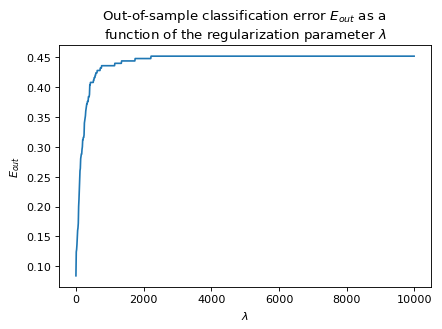

In [7]:
min_E_out = 2**64
best_lambda = None

# step size 10
lambdas = np.arange(0, 10000, 10)
E_out_values = []

for lambda_param in lambdas:
    w_reg = get_w_reg(Z_train, y_train, lambda_param)
    E_out = sum(y_test != np.sign(np.dot(Z_test, w_reg))) / N_test
    E_out_values.append(E_out)
    if E_out < min_E_out:
        min_E_out = E_out
        best_lambda = lambda_param
        
print("Checking lambda range: 0 to 10000 with stepsize 10")
print("best lambda = ", best_lambda, " with E_out =", min_E_out)
fig1 = plt.figure(1, dpi =80)
plt.title('Out-of-sample classification error $E_{out}$ as a \nfunction of the regularization parameter $\lambda$')
plt.plot(lambdas, E_out_values)
plt.ylabel('$E_{out}$')
plt.xlabel('$\lambda$')
plt.show()

- If we use a stepsize of 10, then we will miss the choice $\lambda = 0.01$. In that case $\lambda = 0$ appears to achieve the smallest $E_{out}$.

- The error $E_{out}$ reaches a plateau of 0.45.

### 6.2 b) range $\lambda \in [0, 1]$

Checking lambda range: 0 to 1 with stepsize 0.001
best lambda =  0.094  with E_out = 0.056


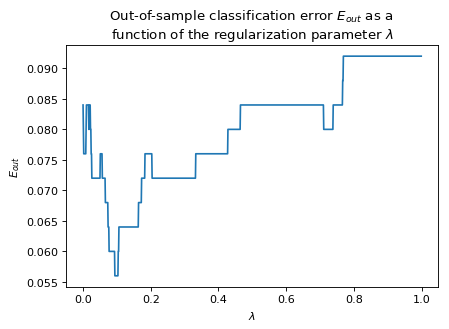

In [8]:
min_E_out = 2**64
best_lambda = None


lambdas = np.arange(0, 1, 0.001)
E_out_values = []

for lambda_param in lambdas:
    w_reg = get_w_reg(Z_train, y_train, lambda_param)
    E_out = sum(y_test != np.sign(np.dot(Z_test, w_reg))) / N_test
    E_out_values.append(E_out)
    if E_out < min_E_out:
        min_E_out = E_out
        best_lambda = lambda_param

print("Checking lambda range: 0 to 1 with stepsize 0.001")        
print("best lambda = ", best_lambda, " with E_out =", min_E_out)
fig1 = plt.figure(1, dpi =80)
plt.title('Out-of-sample classification error $E_{out}$ as a \nfunction of the regularization parameter $\lambda$')
plt.plot(lambdas, E_out_values)
plt.ylabel('$E_{out}$')
plt.xlabel('$\lambda$')
plt.show()


From the plot we can see that $E_{out}$ has its minimum between $0.0$ and $0.2$ . This confirms that our choice $k=-1$ for $\lambda = 10^k$, i.e. $\lambda = 0.1$,  minimizes $E_{out}$.

## Result

The smallest $E_{out}$ is achieved for the choice $k=-1$, i.e. $\lambda = 0.1$  with $E_{out} = 0.056$.

The answer is therefore **6[b]** 0.06.

# Conclusion

- Without regularization the out-of-sample error is $E_{out} = 0.084$.

- With regularization we managed to reduce the out-of-sample error to $E_{out} = 0.056$. That's an improvement of $2.8\%$.